# LangChain: Models, Prompts and Output Parsers


## Outline

 * Direct API calls to OpenAI
 * API calls through LangChain:
   * Prompts
   * Models
   * Output parsers

- **OpenAI Chat = low-level**
- **LangChain ChatOpenAI = abstraction layer**

| OpenAI           | LangChain         |
| ---------------- | ----------------- |
| Prompt as string | Prompt as object  |
| Manual handling  | Managed pipeline  |
| One call         | Chains & agents   |
| No validation    | Parsers & schemas |


- **OpenAI API → gives raw power**

- **LangChain → gives structure**

- **Pydantic → gives safety**

## Get your [OpenAI API Key](https://platform.openai.com/account/api-keys)

In [ ]:
#!pip install python-dotenv
#!pip install openai

#  Step 1 Setup Open API Key

In [1]:
from openai import OpenAI

# Read API key from text file
with open(r"D:\desktop\Pankaj_New_OpenAI_Key.txt", "r") as file:
    OPENAI_API_KEY = file.read().strip()

# Create OpenAI client
client = OpenAI(api_key=OPENAI_API_KEY)

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

## Chat API : OpenAI

Let's start with a direct API calls to OpenAI.

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    response = client.responses.create(
        model=model,
        input=prompt,
        temperature=0 # this is the degree of randomness of the model's output
    )
    return response.output_text

In [5]:
get_completion("What is 8+5?")

'8 + 5 equals 13.'

In [ ]:
# Let us  get an customer email

In [7]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [9]:
style = """American English \
in a calm and respectful tone
"""

In [11]:
prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is American English in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



In [ ]:
# To get the response

In [13]:
response = get_completion(prompt)

In [15]:
response

"I'm really frustrated that my blender lid flew off and splattered my kitchen walls with smoothie! And to make matters worse, the warranty doesn't cover the cost of cleaning up my kitchen. I could really use your help right now, friend."

## Chat API : LangChain

# Let's try how we can do the same using LangChain.

In [ ]:
#!pip install --upgrade langchain

### Model

In [17]:
from langchain_openai import ChatOpenAI

In [19]:
chat = ChatOpenAI(openai_api_key=OPENAI_API_KEY)
chat

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000020632A6C510>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000020632A6EB10>, root_client=<openai.OpenAI object at 0x0000020628666550>, root_async_client=<openai.AsyncOpenAI object at 0x0000020632A6E9D0>, model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

In [21]:
# To control the randomness and creativity of the generated
# text by an LLM, use temperature = 0.0

chat = ChatOpenAI(
    temperature=0.0,
    model="gpt-3.5-turbo",
    timeout=30,
    openai_api_key=OPENAI_API_KEY  # Replace with your actual API key
)




In [23]:
from langchain_core.messages import HumanMessage

response = chat.invoke([HumanMessage(content="Translate the following into a polite tone: WHERE IS MY ORDER??")])

print(response.content)


May I kindly inquire about the status of my order?


### Prompt template

In [25]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [ ]:
# To reuse this prompt template

In [27]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)


In [29]:
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], input_types={}, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n')

In [31]:
prompt_template.messages[0].prompt.template

'Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n'

In [33]:
prompt_template.messages[0].prompt.input_variables

['style', 'text']

In [35]:
customer_style = """American English \
in a calm and respectful tone
"""

In [37]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [39]:
customer_messages = prompt_template.format_messages(
                    style=customer_style,
                    text=customer_email)

In [41]:
print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain_core.messages.human.HumanMessage'>


In [43]:
print(customer_messages[0])

content="Translate the text that is delimited by triple backticks into a style that is American English in a calm and respectful tone\n. text: ```\nArrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse, the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!\n```\n" additional_kwargs={} response_metadata={}


In [45]:
# Call the LLM to translate to the style of the customer message
customer_response = chat.invoke(customer_messages)

In [47]:
print(customer_response.content)

I'm really frustrated that my blender lid flew off and splattered my kitchen walls with smoothie! And to make matters worse, the warranty doesn't cover the cost of cleaning up my kitchen. I could really use your help right now, friend.


In [ ]:
# Now English-speaking customer service agent reply

In [49]:
service_reply = """Hey there customer, \
the warranty does not cover \
cleaning expenses for your kitchen \
because it's your fault that \
you misused your blender \
by forgetting to put the lid on before \
starting the blender. \
Tough luck! See ya!
"""

In [ ]:
# Let us get the polite tone reply reusing reuse the prompt template

In [57]:
service_style_pirate = """\
a polite tone \
that speaks in English Formal\
"""

In [59]:
service_messages = prompt_template.format_messages(
    style=service_style_pirate,
    text=service_reply)

print(service_messages[0].content)

Translate the text that is delimited by triple backticks into a style that is a polite tone that speaks in English Formal. text: ```Hey there customer, the warranty does not cover cleaning expenses for your kitchen because it's your fault that you misused your blender by forgetting to put the lid on before starting the blender. Tough luck! See ya!
```



In [61]:
service_response = chat.invoke(service_messages)
print(service_response.content)

Dear valued customer,

We regret to inform you that the warranty does not extend to cover cleaning expenses for your kitchen. It has come to our attention that the issue arose due to misuse of the blender, specifically by neglecting to secure the lid before operation. 

We apologize for any inconvenience this may have caused and appreciate your understanding in this matter. If you have any further questions or concerns, please do not hesitate to contact us.

Thank you for your attention to this matter.

Sincerely, [Your Company Name]


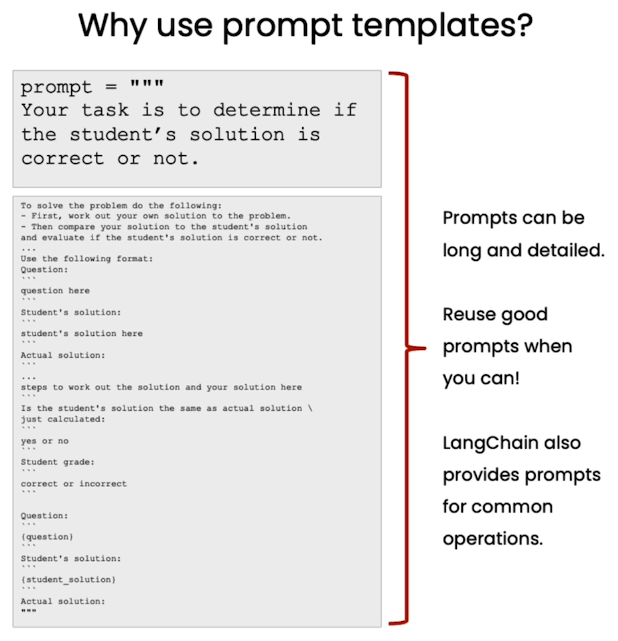

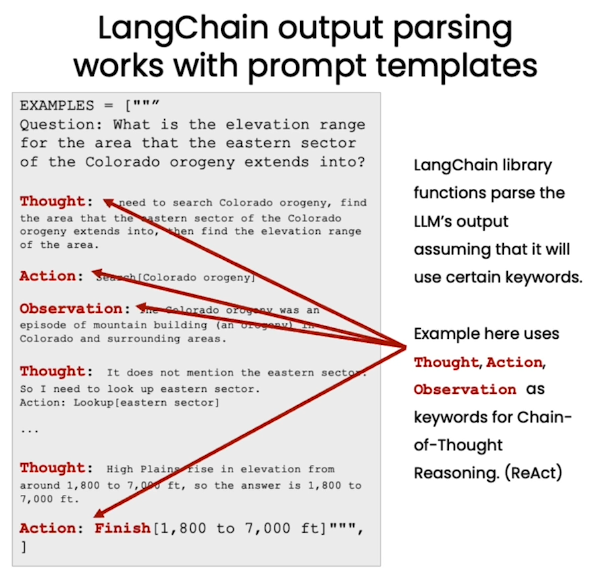

## Output Parsers

Let's start with defining how we would like the LLM output to look like:

In [ ]:
# Exmaple of desire output

In [ ]:
{
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

In [63]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""



In [65]:
review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [67]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n'), additional_kwargs={})]


In [69]:
messages = prompt_template.format_messages(text=customer_review)
chat = ChatOpenAI(temperature=0.0, model="gpt-3.5-turbo",openai_api_key=OPENAI_API_KEY)
response = chat.invoke(messages)
print(response.content)

{
    "gift": true,
    "delivery_days": 2,
    "price_value": "It's slightly more expensive than the other leaf blowers out there"
}


In [71]:
type(response.content)

str

In [ ]:
# You will get an error by running this line of code 
# because'gift' is not a dictionary
# 'gift' is a string
#response.content.get('gift')

### Parse the LLM output into structured JSON using a Pydantic schema.

In [73]:
from langchain_core.output_parsers import  JsonOutputParser
from pydantic import BaseModel, Field
from typing import List


In [75]:
# Define the structured schema with Pydantic

class ReviewExtraction(BaseModel):
    gift: bool = Field(...,description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
    delivery_days: int = Field(...,description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
    price_value: List[str] = Field(default= ...,description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

   

In [77]:
# Create the parser and format instructions
output_parser = JsonOutputParser(pydantic_object=ReviewExtraction)
output_parser 

JsonOutputParser(pydantic_object=<class '__main__.ReviewExtraction'>)

In [79]:
format_instructions = output_parser.get_format_instructions()

In [81]:
print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"gift": {"description": "Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.", "title": "Gift", "type": "boolean"}, "delivery_days": {"description": "How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.", "titl

In [83]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""



In [85]:
prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review, 
                                format_instructions=format_instructions)

In [87]:
print(messages[0].content)

For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,and output them as a comma separated Python list.

text: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife's anniversary present. I think my wife liked it so much she was speechless. So far I've been the only one using it, and I've been using it every other morning to clear the leaves on our lawn. It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features.


The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties

In [89]:
response = chat.invoke(messages)

In [91]:
print(response.content)

{
    "gift": false,
    "delivery_days": 2,
    "price_value": ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]
}


In [93]:
type(response.content.get('gift'))

AttributeError: 'str' object has no attribute 'get'

In [97]:
output_dict = output_parser.parse(response.content)

In [99]:
output_dict

{'gift': False,
 'delivery_days': 2,
 'price_value': ["It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."]}

In [101]:
type(output_dict)

dict

In [103]:
output_dict.get('gift')

False

In [105]:
output_dict.get('delivery_days')

2

In [109]:
type(output_dict.get('price_value'))

list

Reminder: Download your notebook to you local computer to save your work.